
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [135]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [4]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

* We will be using the CLT for proportions in this case.

In [153]:
# prepare dataframe of sampling distributions
dfp = pd.DataFrame({'got callback': (['yes', 'no']),'b': ([len(data[(data.race=='b') & (data.call==1)]), len(data[(data.race=='b') & (data.call==0)])]),'w': ([len(data[(data.race=='w') & (data.call==1)]), len(data[(data.race=='w') & (data.call==0)])])})

dfp.set_index('got callback')
dfp[['b','w']] = dfp[['b','w']].astype(float)

# find totals for each races
btot = dfp.b[0] + dfp.b[1]
wtot = dfp.w[0] + dfp.w[1]

# find proportions of callbacks for each of the races
pb = round(dfp.b[0] / btot, 2)
pw = round(dfp.w[0] / wtot, 2)

print "The proportion of callbacks received by black-sounding names = %s" % pb 
print "The proportion of callbacks received by white-sounding names = %s" % pw


The proportion of callbacks received by black-sounding names = 0.06
The proportion of callbacks received by white-sounding names = 0.1


* Our Hypothesis:
    * **H0: pb - pw = 0**
    * **Ha: pb - pw != 0**
* Calculate the pooled proportion ($\hat{ppool}$)(in the next cell):

In [113]:
ppool = round((dfp.b[0] + dfp.w[0])/((dfp.b[0] + dfp.b[1]) + (dfp.w[0] + dfp.w[1])), 2)
print "The pooled proportion = %s" % ppool

The pooled proportion = 0.08


* Verify the conditions for inference:
    * independence: Since the race value has been randomly assigned to the resumes, each sample of black-sounding and white-sounding will be independent to each other and there is no dependence between the two race values. Also the sample is < 10% of total population
    * Sample size and skew: 

In [114]:
sb1 = btot * ppool
sb2 = btot * (1 - ppool)
sw1 = wtot * ppool
sw2 = wtot * (1 - ppool)

print "%s %s" % (btot, wtot)
print "Success-Failure metric for black-sounding name sample = %s and %s" % (sb1, sb2)
print "Success-Failure metric for white-sounding name sample = %s and %s" % (sw1, sw2)

nv = 0

2435.0 2435.0
Success-Failure metric for black-sounding name sample = 194.8 and 2240.2
Success-Failure metric for white-sounding name sample = 194.8 and 2240.2


        * Since both values for success-failure conditions for both samples are > 10, we can assume that the sampling distribution of the difference in the two proportions is nearly normal. ie. 
$(\hat{pb} - \hat{pa}) \sim N(null value, SE)$

* Now we can find the test statistic:


In [131]:
pe = pb - pw
SE = round(np.sqrt(((ppool * (1 - ppool))/btot) + ((ppool * (1 - ppool))/wtot)), 2)

print "point estimate = %s" % pe
print "Standard error = %s" % SE

point estimate = -0.04
Standard error = 0.01


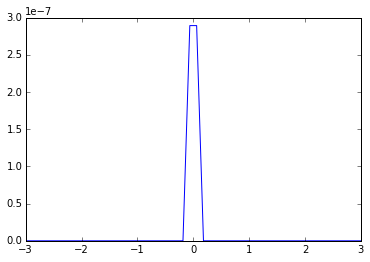

In [132]:
from scipy.stats import norm

l = np.linspace(-3+nv,3+nv)
plt.plot(l,norm.pdf(l,nv,SE));

In [133]:
z = (pe - nv)/SE
print "The test statistic = %s" % z

The test statistic = -4.0


In [143]:
pvalue = round(2*st.norm.cdf(z),2)
print "The p-value = %s" % pvalue

The p-value = 0.0


Since the **p-value (0) < 0.05**, we reject the null hypothesis.

**We reject the null hypothesis in favor of the alternate and conclude that the data provides statistical evidence that given a sample where resumes are randomly assigned race values of black or white, the proportion of resumes which receive a callback is different for black-sounding names as compared to white-sounding names.**

* Calculating the 95% Margin of error and the confidence interval to confirm how much difference there is in the proportion of callbacks for both samples

In [149]:
me = round(1.96 * (np.sqrt(((pb * (1 - pb))/btot) + ((pw * (1 - pw))/wtot))), 2)

print "The margin of error = %s" % me

The margin of error = 0.02


In [151]:
nci = (pb - pw) - me
pci = (pb - pw) + me

print "The confidence interval is (%s, %s)" % (nci, pci)

The confidence interval is (-0.06, -0.02)


**The confidence interval computed in the above cell confirms that the proportion of resumes with black-sounding names get 2% - 6% less callbacks as compared to resumes of white-sounding names.**